# 携程网国内146个热门城市攻略地的景点信息数据分析
- 数据来源：通过爬取携程网的146个热门旅游城市信息所得  https://you.ctrip.com/place/
- 分析探讨：有哪些旅游目的地热门？哪些地方可能人多？哪些地方好评率高？哪些地方既便宜又值得去？国内的旅游资源怎么样？省内的又怎么样？ 等等

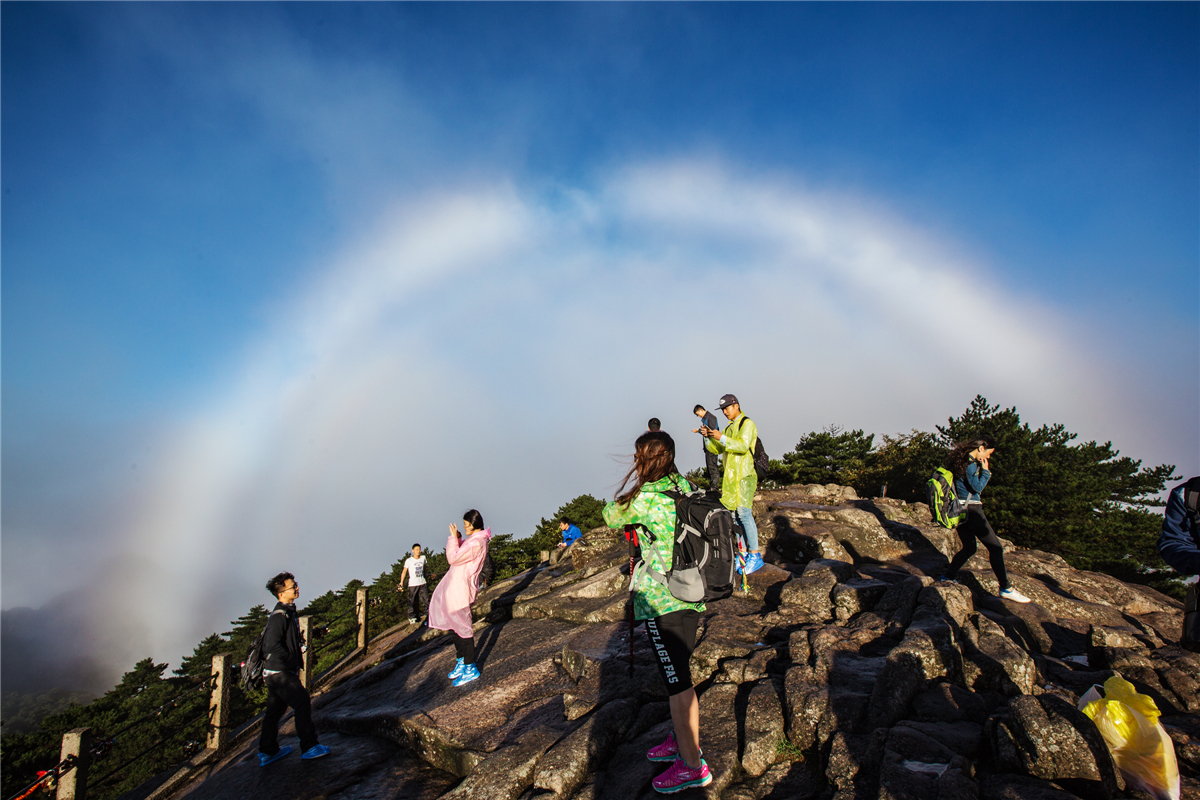

## 数据采集部分

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random

headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.88 Safari/537.36'}
# 获取城市名和城市ID
urls = 'https://you.ctrip.com/place/'
r = requests.get(urls,headers=headers)
soups = BeautifulSoup(r.text,'lxml')
pro_city = soups.select('dd[class="panel-con"] ul')[0].select('li')  

city_list = []
eng_list = []
data = []
pro_list = []
num = 0
for li in pro_city:
    province = li.select('strong')[0].text
    citys = li.select('a')
    for a in citys:
        eng_name = a['href'].split('/')[-1].split('.')[0]
        city_list.append(a.text)
        pro_list.append(province)
        eng_list.append(eng_name)

# 将城市ID用到目标地址里        
for ename,pro,ci in zip(eng_list,pro_list,city_list):
    time.sleep(random.random())
    for i in range(1,4):
# ******  爬取的目标网址   ***********
        url = 'https://you.ctrip.com/sight/'+ ename + '/s0-p'+ str(i) +'.html#sightname'
        results = {}
        rr = requests.get(url, headers=headers, timeout=None)     
        soup = BeautifulSoup(rr.text, 'lxml')
        print(url)
        detail = soup.find_all('div', class_='list_wide_mod2')
        if detail:
            detail = soup.find_all('div', class_='list_wide_mod2')[0]
            for n, m in zip(detail.find_all('dl'), detail.find_all('ul', class_='r_comment')):
                name = n.dt.a.text 
                addr = n.find_all('dd')[0].text.strip()
                level = n.find_all('dd')[1].text.strip().split('|')[0].strip()[:-3]
                if '携程' in level:
                    level = ''
                try:
                    price = float(n.find_all('span', class_='price')[0].text.strip().replace('¥', ''))
                except:
                    price = float(0)
                score = m.find_all('a', class_='score')[0].text.strip().replace('\xa0分', '') # xa0 是不间断空白符 &nbsp; 去掉空格
                if score == '暂无评分':
                    score = float(0)
                else:
                    score = float(score)
                comments = m.find_all('a', class_='recomment')[0].text.strip()[1: -3].replace('条', '')
                if comments == '暂无':
                    comments = float(0)
                else:
                    comments = float(comments)
                results = [pro,ci, name, len(level), price, score, comments, addr]
                data.append(results)
        else:
            print(url,'此页没有数据')

    final_result = pd.DataFrame(data)
    final_result.columns=['province','city', 'name', 'level', 'price', 'score', 'comments', 'addr']
    final_result.to_csv("Ctrip.csv",encoding="utf_8",index = False)
    num += 1
    print(num,'已经保存',pro,ci,'的数据')
print('共保存',num,'个地区景点数据')

https://you.ctrip.com/sight/haerbin151/s0-p1.html#sightname
https://you.ctrip.com/sight/haerbin151/s0-p2.html#sightname
https://you.ctrip.com/sight/haerbin151/s0-p3.html#sightname
1 已经保存 黑龙江 哈尔滨 的数据
https://you.ctrip.com/sight/mudanjiang264/s0-p1.html#sightname
https://you.ctrip.com/sight/mudanjiang264/s0-p2.html#sightname
https://you.ctrip.com/sight/mudanjiang264/s0-p3.html#sightname
2 已经保存 黑龙江 牡丹江 的数据
https://you.ctrip.com/sight/mohe983/s0-p1.html#sightname
https://you.ctrip.com/sight/mohe983/s0-p2.html#sightname
https://you.ctrip.com/sight/mohe983/s0-p3.html#sightname
3 已经保存 黑龙江 漠河 的数据
https://you.ctrip.com/sight/yichun498/s0-p1.html#sightname
https://you.ctrip.com/sight/yichun498/s0-p2.html#sightname
https://you.ctrip.com/sight/yichun498/s0-p3.html#sightname
4 已经保存 黑龙江 伊春 的数据
https://you.ctrip.com/sight/heihe265/s0-p1.html#sightname
https://you.ctrip.com/sight/heihe265/s0-p2.html#sightname
https://you.ctrip.com/sight/heihe265/s0-p3.html#sightname
5 已经保存 黑龙江 黑河 的数据
https://you.ctrip

https://you.ctrip.com/sight/yuncheng397/s0-p2.html#sightname
https://you.ctrip.com/sight/yuncheng397/s0-p3.html#sightname
42 已经保存 山西 运城 的数据
https://you.ctrip.com/sight/linfen318/s0-p1.html#sightname
https://you.ctrip.com/sight/linfen318/s0-p2.html#sightname
https://you.ctrip.com/sight/linfen318/s0-p3.html#sightname
43 已经保存 山西 临汾 的数据
https://you.ctrip.com/sight/yinchuan239/s0-p1.html#sightname
https://you.ctrip.com/sight/yinchuan239/s0-p2.html#sightname
https://you.ctrip.com/sight/yinchuan239/s0-p3.html#sightname
44 已经保存 宁夏 银川 的数据
https://you.ctrip.com/sight/zhongwei1184/s0-p1.html#sightname
https://you.ctrip.com/sight/zhongwei1184/s0-p2.html#sightname
https://you.ctrip.com/sight/zhongwei1184/s0-p3.html#sightname
45 已经保存 宁夏 中卫 的数据
https://you.ctrip.com/sight/wuzhong890/s0-p1.html#sightname
https://you.ctrip.com/sight/wuzhong890/s0-p2.html#sightname
https://you.ctrip.com/sight/wuzhong890/s0-p3.html#sightname
46 已经保存 宁夏 吴中 的数据
https://you.ctrip.com/sight/guyuan888/s0-p1.html#sightname
htt

https://you.ctrip.com/sight/chengdu104/s0-p2.html#sightname
https://you.ctrip.com/sight/chengdu104/s0-p3.html#sightname
83 已经保存 四川 成都 的数据
https://you.ctrip.com/sight/jiuzhaigou25/s0-p1.html#sightname
https://you.ctrip.com/sight/jiuzhaigou25/s0-p2.html#sightname
https://you.ctrip.com/sight/jiuzhaigou25/s0-p3.html#sightname
84 已经保存 四川 九寨沟 的数据
https://you.ctrip.com/sight/emeishan24/s0-p1.html#sightname
https://you.ctrip.com/sight/emeishan24/s0-p2.html#sightname
https://you.ctrip.com/sight/emeishan24/s0-p3.html#sightname
85 已经保存 四川 峨眉山 的数据
https://you.ctrip.com/sight/daocheng342/s0-p1.html#sightname
https://you.ctrip.com/sight/daocheng342/s0-p2.html#sightname
https://you.ctrip.com/sight/daocheng342/s0-p3.html#sightname
86 已经保存 四川 稻城-亚丁 的数据
https://you.ctrip.com/sight/kangding344/s0-p1.html#sightname
https://you.ctrip.com/sight/kangding344/s0-p2.html#sightname
https://you.ctrip.com/sight/kangding344/s0-p3.html#sightname
87 已经保存 四川 康定 的数据
https://you.ctrip.com/sight/wuhan145/s0-p1.html#sight

https://you.ctrip.com/sight/shenzhen26/s0-p2.html#sightname
https://you.ctrip.com/sight/shenzhen26/s0-p3.html#sightname
124 已经保存 广东 深圳 的数据
https://you.ctrip.com/sight/guangzhou152/s0-p1.html#sightname
https://you.ctrip.com/sight/guangzhou152/s0-p2.html#sightname
https://you.ctrip.com/sight/guangzhou152/s0-p3.html#sightname
125 已经保存 广东 广州 的数据
https://you.ctrip.com/sight/zhuhai27/s0-p1.html#sightname
https://you.ctrip.com/sight/zhuhai27/s0-p2.html#sightname
https://you.ctrip.com/sight/zhuhai27/s0-p3.html#sightname
126 已经保存 广东 珠海 的数据
https://you.ctrip.com/sight/huizhou213/s0-p1.html#sightname
https://you.ctrip.com/sight/huizhou213/s0-p2.html#sightname
https://you.ctrip.com/sight/huizhou213/s0-p3.html#sightname
127 已经保存 广东 惠州 的数据
https://you.ctrip.com/sight/zhaoqing269/s0-p1.html#sightname
https://you.ctrip.com/sight/zhaoqing269/s0-p2.html#sightname
https://you.ctrip.com/sight/zhaoqing269/s0-p3.html#sightname
128 已经保存 广东 肇庆 的数据
https://you.ctrip.com/sight/guilin28/s0-p1.html#sightname
http

## 数据初探

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings 
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
ctrip = pd.read_csv('Ctrip.csv')
ctrip.head()

,province,city,name,level,price,score,comments,addr
0,黑龙江,哈尔滨,中央大街,0,0.0,4.7,6930.0,哈尔滨市道里区
1,黑龙江,哈尔滨,哈尔滨冰雪大世界,0,200.0,4.7,26701.0,哈尔滨市松北区太阳岛西区冰雪大世界园区
2,黑龙江,哈尔滨,圣索菲亚大教堂,4,0.0,4.6,4987.0,哈尔滨市道里区透笼街88号
3,黑龙江,哈尔滨,松花江,0,0.0,4.6,1689.0,哈尔滨市呼兰区
4,黑龙江,哈尔滨,防洪纪念塔,0,0.0,4.4,631.0,哈尔滨市道里区中央大街尽头广场


### 数据概述
#### 基本统计信息描述

In [3]:
ctrip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6489 entries, 0 to 6488
Data columns (total 8 columns):
province    6489 non-null object
city        6489 non-null object
name        6489 non-null object
level       6489 non-null int64
price       6489 non-null float64
score       6489 non-null float64
comments    6489 non-null float64
addr        6479 non-null object
dtypes: float64(3), int64(1), object(4)
memory usage: 405.6+ KB


** 基本概览： **
*** 
- 共6489条记录数,8个特征列，数值型占4列:level、price、score、comments;类别型占4列:province、city、name、addr
- addr地址列缺失了10个地址
***
** Ctrip表7个特征列所代表的含义如下： **
***
- province: 目的地所在省名
- city: 目的地所在城市名
- name: 攻略地全称
- level： 攻略地评级，4代表4A级风景区，5代表5A级风景区（最高级），0代表没有级称。
- price：攻略地门票价格，0代表大多数不用门票(例如天安门广场，xx公园,xx公庙这些公益性场所)和少量门票没有在携程网站上发售。
- score： 攻略地评分，5分满分制，0代表没有人评分，不是最低评分的意思。
- comments： 游客对攻略地的评论总数
- addr： 攻略地详细地址
***

####  数值型特征的描述性统计

In [4]:
ctrip.describe()

,level,price,score,comments
count,6489.000000,6489.000000,6489.000000,6489.000000
mean,0.731546,22.616751,4.311774,793.524426
std,1.590196,74.109373,0.638285,3729.631421
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,4.300000,24.000000
50%,0.000000,0.000000,4.400000,81.000000
75%,0.000000,10.000000,4.600000,322.000000
max,5.000000,2899.000000,5.000000,137575.000000


从上可以得知：
1. 评级：超过7.5成旅游目的地没有景区评级。
***
2. 价格：超过一半是不用门票的，说明此次分析的攻略地至少一半属于公共场所。平均票价22.6元，在此处意义不大，因为不用门票的已占了至少一半，自然拉低平均值，应剔除不需要门票这部分。
3. 评分：平均分为4.3，略低。但发现最小的分数是0，0是没人评分，所以应该剔除这部分再计算。
4. 评论：与评分情况相似，应该先剔除部分再看计算结果。

### 数据预处理
#### 对以上数值型数据进行处理

In [3]:
# 评分  没人评分占比情况：
s = round(ctrip.score[ctrip.score == 0].count() / ctrip.score.count(),2)
# 评论  没人评论占比情况:
c = round(ctrip.comments[ctrip.comments == 0].count() / ctrip.comments.count(),2)
# s, c
if s > c:
    ctrip = ctrip[ctrip.score > 0]
else:
    ctrip = ctrip[ctrip.comments > 0]

In [4]:
ctrip.head()

,province,city,name,level,price,score,comments,addr
0,黑龙江,哈尔滨,中央大街,0,0.0,4.7,6930.0,哈尔滨市道里区
1,黑龙江,哈尔滨,哈尔滨冰雪大世界,0,200.0,4.7,26701.0,哈尔滨市松北区太阳岛西区冰雪大世界园区
2,黑龙江,哈尔滨,圣索菲亚大教堂,4,0.0,4.6,4987.0,哈尔滨市道里区透笼街88号
3,黑龙江,哈尔滨,松花江,0,0.0,4.6,1689.0,哈尔滨市呼兰区
4,黑龙江,哈尔滨,防洪纪念塔,0,0.0,4.4,631.0,哈尔滨市道里区中央大街尽头广场


In [5]:
ctrip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6378 entries, 0 to 6488
Data columns (total 8 columns):
province    6378 non-null object
city        6378 non-null object
name        6378 non-null object
level       6378 non-null int64
price       6378 non-null float64
score       6378 non-null float64
comments    6378 non-null float64
addr        6368 non-null object
dtypes: float64(3), int64(1), object(4)
memory usage: 448.5+ KB


可以发现：
- 总记录数已变为6378条，减少了110条，addr地址列还是缺失10个。

In [8]:
ctrip.describe()
print('门票价格均值：',ctrip[ctrip.price>0].price.sum()/ctrip[ctrip.price>0].price.count())

,level,price,score,comments
count,6378.000000,6378.000000,6378.000000,6378.000000
mean,0.744277,22.980887,4.386814,807.329727
std,1.601019,74.678763,0.291993,3760.469587
min,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,4.300000,26.000000
50%,0.000000,0.000000,4.400000,85.000000
75%,0.000000,15.000000,4.600000,329.000000
max,5.000000,2899.000000,5.000000,137575.000000


门票价格均值： 87.55800477897253


经过处理后可以发现：
- 价格：对于需要门票的景点，平均票价为87.6元，不算高，贴合绝大多数人消费能力。
- 评分：平均分接近4.4分，提高了一点点；有五成的评分在4.4之下(包括4.4)，大约处于中下水平，游客对景区总体评价不高。
- 评论：平均评论条数约为807条，评论数是累积的过程，此处假设一人对一条评论数、总记录数就是全国的景点数，两者相乘可得约共560万人对景点写了点评，这实质反映的是我国旅游消费人群总数(仅是此数据集)，对于我国而言，待发掘旅游消费的人数巨大。另一方面， 最大最小的评论数差异巨大，这或许能解释每逢节假日时热门的景点更加热门，看的是"人景"而不是风景，冷门的景点更加冷门，其实反映了我国优质的旅游场所还是偏少。

#### 检测与处理重复值

In [6]:
# 直接对表数据进行记录去重
ctrip.drop_duplicates(inplace=True)

ctrip.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6378 entries, 0 to 6488
Data columns (total 8 columns):
province    6378 non-null object
city        6378 non-null object
name        6378 non-null object
level       6378 non-null int64
price       6378 non-null float64
score       6378 non-null float64
comments    6378 non-null float64
addr        6368 non-null object
dtypes: float64(3), int64(1), object(4)
memory usage: 448.5+ KB


可以看到：
- 总记录数没有变化, 所以重复值为0

#### 检测与处理缺失值
- 上面已经发现是缺失的是是个地址，把缺失值找出来，并处理

In [7]:
lack_addr = ctrip.loc[ctrip['addr'].isnull()]  # ctrip[ctrip.addr.isnull()]
lack_addr

lack_id = lack_addr.index
# lack_id

- 查看网站这几个缺失的地址在景点的详细页里，直接从里面复制出来，再赋值到相应的位置上

In [8]:
alist = ['广西壮族自治区百色市右江新兴路22号',
'台湾台北市北投区温泉路',
'高雄旗津贝壳馆',  
'高雄市小港区名胜街135巷10巷12号',    
'高雄市旗津区庙前路95号（旗津轮渡站正对面）',    
'台南市东区林森路一段与崇善路口',   
'台南市七股区盐埕里66号',   
'油麻地庙街', 
'澳门Penha Hill的山顶',
'澳门路轿跑车有限公司信义天地水上舞厅剧院（位于君悦酒店二楼，满堂中餐厅对面']
for a_id,address in zip(lack_id,alist):
    ctrip.addr[ctrip.index==a_id] = address

G:\pythoninstall\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
G:\pythoninstall\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
G:\pythoninstall\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
G:\pythoninstall\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying

In [9]:
for aa in lack_id:
    ctrip[ctrip.index==aa]
ctrip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6378 entries, 0 to 6488
Data columns (total 8 columns):
province    6378 non-null object
city        6378 non-null object
name        6378 non-null object
level       6378 non-null int64
price       6378 non-null float64
score       6378 non-null float64
comments    6378 non-null float64
addr        6378 non-null object
dtypes: float64(3), int64(1), object(4)
memory usage: 448.5+ KB


- 经过以上处理，发现数据已经没有缺失值，可以开始基本的数据分析

## 数据分析  ——数据可视化 
- ***主要使用 pyecharts库（python+Echarts(百度开源的数据可视化,主要用在web前端上)） GitHub上使用帮助文档：https://pyecharts.org/#/zh-cn/intro***
- ***Echarts官方文档https://www.echartsjs.com/zh/index.html***
- ***js加载需要联网***

In [7]:
# 渲染图形的echarts的js静态资源 默认挂载在https://assets.pyecharts.org/assets/
#- -- - --  把Notebook插件作为静态资源服务  - -- - --
from pyecharts.globals import CurrentConfig, OnlineHostType
CurrentConfig.ONLINE_HOST = OnlineHostType.NOTEBOOK_HOST          

### 热门攻略地分布

#### 热门攻略地全国篇（全国游）

In [4]:
# 没有被评级的景区在全国按省分布
level_rank = ctrip[ctrip.level==0][['level','province']].groupby(by='province').count().sort_values(by='level',ascending = False)
# level_rank.head()
level_value = level_rank.values.tolist()

# A景区在全国按省分布
level_rank1 = ctrip[ctrip.level==1][['level','province']].groupby(by='province').count().sort_values(by='level',ascending = False)
# level_rank1.head()
level_value1 = level_rank1.values.tolist()

# 2A景区在全国按省分布
level_rank2 = ctrip[ctrip.level==2][['level','province']].groupby(by='province').count().sort_values(by='level',ascending = False)
# level_rank2.head()
level_value2 = level_rank2.values.tolist()

# 3A景区在全国按省分布
level_rank3 = ctrip[ctrip.level==3][['level','province']].groupby(by='province').count().sort_values(by='level',ascending = False)
# level_rank3.head()
level_value3 = level_rank3.values.tolist()

# 4A景区在全国按省分布
level_rank4 = ctrip[ctrip.level==4][['level','province']].groupby(by='province').count().sort_values(by='level',ascending = False)
# level_rank4.head()
level_value4 = level_rank4.values.tolist()

# 5A景区在全国按省分布
level_rank5 = ctrip[ctrip.level==5][['level','province']].groupby(by='province').count().sort_values(by='level',ascending = False)
# level_rank5.head()
level_value5 = level_rank5.values.tolist()

In [5]:
from pyecharts import options as opts
from pyecharts.charts import Geo, Map                                                # 地理坐标系、地图
from pyecharts.globals import GeoType,ChartType,SymbolType,ThemeType                 # Geo图类型 主题 

c = (                                                                                 # 单独调用 ：     
    Geo(init_opts=opts.InitOpts(bg_color='#080a20'))                                  #  初始化配置(画布、颜色等)：背景颜色(风格)  # c = Geo()
    .add_schema(maptype = "china",
                itemstyle_opts=opts.ItemStyleOpts(color='#132937',                    #  c.add_schema(maptype="china",itemstyle_opts=opts.ItemStyleOpts(color="#323c48"))
                                                  border_color='#0692a4'),
                emphasis_itemstyle_opts=opts.ItemStyleOpts(color='#0b1c2d'),          # 高亮部分背景色
                emphasis_label_opts=opts.LabelOpts(color='#3ed4ff'))                  # 高亮部分文字颜色
    .add("NoA", [list(z) for z in zip(level_rank.index, level_value)])                #  c.add("NoA", [list(z) for z in zip(level_rank.index, level_value)])
    .add("A", [list(z) for z in zip(level_rank1.index, level_value1)])                #  .....
    .add("2A", [list(z) for z in zip(level_rank2.index, level_value2)])
    .add("3A", [list(z) for z in zip(level_rank3.index, level_value3)])               # ！！数据格式为：[[],[],[]]
    .add("4A", [list(z) for z in zip(level_rank4.index, level_value4)])
    .add("5A", [list(z) for z in zip(level_rank5.index, level_value5)])
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))                       # 系列配置项：图形样式、标签、文字样式等
    .set_global_opts(                                                                 # 全局配置项：标题、图例、坐标轴、工具箱等
        visualmap_opts = opts.VisualMapOpts(pieces=[{'min':0,'max':5},
                                                   {'min':5,'max':10},
                                                  {'min':10,'max':20},
                                                  {'min':20,'max':30},
                                                  {'min':30,'max':50},
                                                  {'min':50,'max':100},
                                                  {'min':100,'max':200},
                                                  {'min':200,'max':250}], 
                                          is_piecewise=True,                         #  is_piecewise分段
                                          textstyle_opts=opts.TextStyleOpts(color='#fff')
                                           ),                        
        title_opts = opts.TitleOpts(title="全国热门旅游攻略地景区分布地图",
                                    title_textstyle_opts=opts.TextStyleOpts(color='#fff')),
        toolbox_opts = opts.ToolboxOpts(),                                             #  右上角工具箱配置
        legend_opts=opts.LegendOpts(pos_top="20",textstyle_opts=opts.TextStyleOpts(color='#fff'))
    )
#     .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}"))  #数据标签配置
)
c.render_notebook()
# c.render() 生成图表的网页文件

从全国热门景区分布图可以的得出：
- 5A级景区：
***
1. 从整体分布上看，5A景区全国分布均匀，颜色较浅，基数较少，几乎每个省都有分布。
2. 从数量上看，在前5名里，<u>江苏省分布最多，有25个；其次是湖北，有16个；</u>再到河南的14个；陕西、重庆、山东各有11个；广西有9个。多分布在华中、华北和华东地区，在长江和黄河流经的省份分布最多。
***
- 4A级景区：
***
1. 从整体分布上看，4A景区中东部地区分布较多，颜色较深，基数较大。
2. 从数量上看，在前5名里，<u>江苏和山东分布最多，有61个，广西次之有58个</u>，再到广东的46个，河南43个，辽宁41个。
3. <u>都在4A和5A榜首前5名的省是，江苏、山东和广西，</u>可以推测这三个省旅游资源丰富，是旅游大省，环境质量较其他省高。
***
- 没有被评级景区：
***
1. 此类攻略地颜色最深，基数最大。排在前5里的是甘肃省247个，台湾222个，贵州207个，海南和江西203个，青海、吉林、四川各有198个。
2. 可以看出除了在台湾，<u>主要分布在经济欠发达的省份</u>，旅游资源也很丰富，但待开发。
***

#### 热门攻略地广东篇（省内游）

In [9]:
# 广东
gd5 = ctrip[ctrip.level==5][ctrip.province=='广东'][['level','city']].groupby(by='city').count()
# gd5
gd_value5 = gd5.values.tolist()

gd4 = ctrip[ctrip.level==4][ctrip.province=='广东'][['level','city']].groupby(by='city').count()
# gd4
gd_value4 = gd4.values.tolist()

gd = ctrip[ctrip.level==0][ctrip.province=='广东'][['level','city']].groupby(by='city').count()
# gd
gd_value = gd.values.tolist()

In [10]:
from pyecharts.commons.utils import JsCode  
#         .set_series_opts(
c = (
    Geo(init_opts=opts.InitOpts(bg_color='#154e90'))                    ### itemsstyle_opts数据格式可为字典，可为调用
    .add_schema(maptype="广东",itemstyle_opts={                         # \\echarts.graphic.RadialGradient径向渐变 ；echarts.graphic.LinearGradient 线性渐变                             
           # - --支持原生JS函数- --                                     # 使用渐变色, 则应使用echarts内置的渐变色生成器echarts.graphic.LinearGradient使用时传入了5个参数.
           # - - - - 封装在JSCode类里面                                 #其中, 前4个参数用于配置渐变色的起止位置, 这4个参数依次对应右/下/左/上四个方位. 而0 0 0 1则代表渐变色从正上方开始.
           # - -- - - --https://pyecharts.org/#/zh-cn/javascript        #第5个参数则是一个数组, 用于配置颜色的渐变过程. 每一项为一个对象, 包含offset和color两个参数. offset的范围是0 ~ 1, 用于表示位置, color颜色. 
            "normal": {
                "borderColor": 'rgba(147, 235, 248, 1)',
                "borderWidth": 1,

                "color": JsCode("""new echarts.graphic.RadialGradient(0.5, 0.5, 0.5, [{
                    offset: 0,
                    color: 'rgba(147, 235, 248, 0)'                         
                }, {
                    offset: 1,
                    color: 'rgba(147, 235, 248, .2)'
                }], false)"""),
                "shadowColor": 'rgba(128, 217, 248, 1)',
            }},
               emphasis_itemstyle_opts=opts.ItemStyleOpts(color='#389BB7'),          # 高亮部分背景色
               emphasis_label_opts=opts.LabelOpts(color='#fff'))
    .add(
        "5A",
        [list(z) for z in zip(gd5.index, gd_value5)],
        type_=ChartType.EFFECT_SCATTER,)
    .add(
        "4A",
        [list(z) for z in zip(gd4.index, gd_value4)],
        type_=ChartType.EFFECT_SCATTER,)
    .add(
        "NoA",
        [list(z) for z in zip(gd.index, gd_value)],
        type_=ChartType.EFFECT_SCATTER,)
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        visualmap_opts=opts.VisualMapOpts(max_=41),
        title_opts=opts.TitleOpts(title="广东热门旅游攻略地景区地图",
                                  title_textstyle_opts=opts.TextStyleOpts(color='#fff')),
        toolbox_opts = opts.ToolboxOpts(),
        legend_opts=opts.LegendOpts(pos_top="20",textstyle_opts=opts.TextStyleOpts(color='auto'))
    )
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}"),)
)
c.render_notebook()

从广东热门景区分布图可以看得出：
***
1. 热门旅游攻略地基本都分布在珠三角城市。
2. 在5A景区等级里，<u>深圳占了一半，有4个</u>，惠州和广州各有2个。
3. 4A景区，<u>广州则占了约一半，有20个</u>，再到惠州的11个，深圳6个，珠海和肇庆分别是5个，4个
4. 没有评级的景区里，珠海和肇庆则分布最多。综合上看，4A和5A景区多分布在经济发达的城市，其中省会城市广州的旅游发展更好，更平均。
***

### 攻略地价格
#### 价格概览

In [11]:
cprice = ctrip[ctrip.level==0].sort_values(by='price',ascending=False)  # 没等级的价格
# cprice.head(20)

In [12]:
cprice_count = len(cprice.level.values.tolist())
vhp = len(cprice[cprice.price>=1000].price.values.tolist())
hp = len(cprice[600<=cprice.price][cprice.price<1000].price.values.tolist())
ahp = len(cprice[400<=cprice.price][cprice.price<600].price.values.tolist())
aahp = len(cprice[200<=cprice.price][cprice.price<400].price.values.tolist())
okp = len(cprice[100<=cprice.price][cprice.price<200].price.values.tolist())
vokp = len(cprice[1<=cprice.price][cprice.price<100].price.values.tolist())
vvokp = len(cprice[cprice.price==0].price.values.tolist())
pr = [vhp,hp,ahp,aahp,okp,vokp,vvokp]
pname = ['￥1k-3k','￥600-1k','￥400-600','￥200-400','￥100-200','￥1-100','￥0']

In [13]:
cprice2 = ctrip[ctrip.level>0].sort_values(by='price',ascending=False)  # A级以上价格
# cprice2.head()
cprice_count2 = len(cprice2.level.values.tolist())
Ap1 = len(cprice2[cprice2.price>=400].price.values.tolist())
Ap2 = len(cprice2[cprice2.price>=200][cprice2.price<400].price.values.tolist())
Ap3 = len(cprice2[cprice2.price>=100][cprice2.price<200].price.values.tolist())
Ap4 = len(cprice2[cprice2.price>=1][cprice2.price<100].price.values.tolist())
Ap5 = len(cprice2[cprice2.price==0].price.values.tolist())
Alis = [Ap1,Ap2,Ap3,Ap4,Ap5]
Aname = ['￥400-600','￥200-400','￥100-200','￥1-100','￥0']

In [14]:
from pyecharts.charts import Pie                             # 饼图 

pie_c = (
    Pie(init_opts=opts.InitOpts(bg_color='#031f2d'))
    # NO.1 Circle Pie
    .add(
        "A级以下景点门票占比Pie图",
        [list(z) for z in zip(pname, pr)],
        radius=["40%", "50%"],
        center=["30%", "55%"],                                #  位置
        label_opts=opts.LabelOpts(                            # 标签配置项
                position="outside",
                formatter="{b} ：{c}  {per|{d}%}  ",          # 饼图、仪表盘、漏斗图: {a}（系列名称），{b}（数据项名称），{c}（数值）, {d}（百分比）
                background_color="#eee",
                border_color="#aaa",
                border_width=0.5,
                border_radius=10,
                font_size = 14,
                font_weight = 'bold',
                rich={                                        # rich 自定义富文本样式
                    "per": {
                        "color": "#eee",                      # 百分比字体颜色
                        "backgroundColor": "#334455",
                        "padding": [2, 4],
                        "borderRadius": 2,
                    },
                },
            ),
        )
  # NO.2 Circle Pie 在NO.1的基础上
    .add(
    "A级以下景点总数",
    [['<A', cprice_count]],
    radius=["40%", "40%"],
    center=["30%", "55%"],                                #  位置
    label_opts=opts.LabelOpts(formatter="{a}\n\n{per|{c}}", 
                              position="center",
                              font_size = 20,
                              rich={
                                "per": {
                                    "color": "#fff",
                                    "fontSize": 23,
                                    "fontWeight":'bolder'
                                },
                }),
    )
    # NO.3 Circle Pie  玫瑰图
    .add(
        "A级以上景点门票占比Pie玫瑰图",
        [list(z) for z in zip(Aname, Alis)],
        radius=["30%", "95%"],                                 # 圆环
        center=["85%", "55%"],
        rosetype="area",
        label_opts=opts.LabelOpts(                              # 标签配置项
                position="inside",
                formatter="{b}\n{per|{d}%}",
                font_size = 14,
                font_weight = 'bold',
                rich={
                    "per": {
                        "color": "#49dff0",
                        "backgroundColor": "#666",
                        "padding": [2, 4],
                        "borderRadius": 8,
                    },
                },
            ),
    )
      # NO.4 Circle Pie 在NO.3的基础上
    .add(
    "A级以上景点总数",
    [['>=A', cprice_count2]],
    radius=["30%", "30%"],
    center=["85%", "55%"],                                #  位置
    label_opts=opts.LabelOpts(formatter="{a}\n\n{per|{c}}", 
                              position="center",
                              font_size = 16,
                              rich={
                                "per": {
                                    "color": "#ffc72b",
                                    "fontSize": 20,
                                    "fontWeight":'bolder'
                                },
                }),
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="旅游攻略地门票占比饼图",
                                               title_textstyle_opts=opts.TextStyleOpts(color='#fff',font_size=25),
                                               subtitle="左图为A级以下(不含A)景区价格占比图\n右图为A级及以上景区价格占比图",  # 副标题
                                               subtitle_textstyle_opts={'font_weight':'bolder','color':'#bcf9ef'}),
                    legend_opts=opts.LegendOpts(orient="vertical", pos_top="20%", pos_left="2%",textstyle_opts=opts.TextStyleOpts(color='auto')),
                    toolbox_opts = opts.ToolboxOpts(),)
#     .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))    
    .set_colors(['#c487ee', '#deb140', '#49dff0', '#034079', '#6f81da', '#00ffb4'])       # 自定义颜色
)
pie_c.render_notebook()

从上面的价格占比图可以看出：
- <u>原本以为A级以上都要门票，但实际情况并不是</u>,例如5A级的北极村就不用。
- A级以下，即没有等级的景区里，<u>约8成多的景区攻略地不用门票</u>。近9.5成景区攻略地门票价格在100元以内。也有高票价的，可以发现，这些高票价的地方，比那些4A、5A级风景区门票还要高。
- A级及以上，近4成不用门票，可以发现这四成里面也有很多是公园悠闲场所，被评上4A级及以上，说明这部分旅游地发展质量还是比较好的。<u>近8成半门票价格在100元以内。</u>200元至600元的才占2成多一点，最高的票价也不过600。说明A级以上门票价格也并不是很贵，绝大部分还比较便宜。
- 景区无论有无评级，<u>都是约9成的门票价格在100元以内，门票价格并没有很贵</u>，都比较亲民，<u>花销大的也许是我们在旅途上衣食住行和在游玩项目上的费用。</u>
***

In [19]:
from pyecharts.charts import WordCloud                       # 词云图 
from collections import Counter                              

p = ctrip[ctrip.price==0].name.values.tolist()                # 无需门票的景区
p_list, p_list2 = [], []
for i in p:
    p_list.append(i[-1])                                      # 取景点名称的最后一个字作为关键字
c = Counter(p_list).most_common()                             # 用内置的collections库 统计词频
for j in c:
    p_list2.append(list(j))
    
word_c = (
    WordCloud(init_opts=opts.InitOpts(theme=ThemeType.ROMANTIC,height='500px'))  
    .add("无需门票的景点：", 
         p_list2, 
         word_size_range=[15, 45], shape='cardioid')  #  'circle', 'cardioid', 'diamond', 'triangle-forward', 'triangle', 'pentagon', 'star'
    .set_global_opts(title_opts=opts.TitleOpts(title="无需门票的景点类型"))
)
word_c.render_notebook()

In [128]:
# park = ctrip[ctrip.name.str.contains('区')][ctrip.price==0]  # pandas模糊筛选
# park 

从词云图可得：
- 这部分<u>不需要门票的目的地，主要是一些xxx公园，xxx寺、xxx广场、xxx步行街、xxx博物馆等公益场所</u>。

#### 5A和4A景区价格比较

In [20]:
price_5 = ctrip[ctrip.level==5].sort_values(by='price',ascending=True)  # 225
# price_5.price.values.tolist()
price_4 = ctrip[ctrip.level==4].sort_values(by='price',ascending=True)  # 862   top:420
# price_4.count()
# price_4.price.values.tolist()

In [21]:
from pyecharts.charts import Scatter
from pyecharts.faker import Faker

def scatter_visualmap_color() -> Scatter:
    c = (
        Scatter(init_opts=opts.InitOpts(bg_color='#1b2735'))
        .add_xaxis([i for i in range(0,900)])                                                          # x轴坐标
        .add_yaxis("5A", price_5.price.values.tolist(),                                                 # 第一个y轴
                  symbol='triangle',symbol_rotate=180,symbol_size=15,
                  label_opts=opts.LabelOpts(is_show=False),
                  markline_opts=opts.MarkLineOpts(data=[opts.MarkLineItem(type_="max",name='最高价',),
                                                        opts.MarkLineItem(type_="min",name='最低价'),
                                                        opts.MarkLineItem(type_="average",name='平均价')],
                                                  linestyle_opts=opts.LineStyleOpts(color='rgba(255,100,97',
                                                                                    type_='dashed')
                                                    ),
                  )
        .add_yaxis("4A", price_4.price.values.tolist(),                                                  # 第二个y轴
                  label_opts=opts.LabelOpts(is_show=False),
                  markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(type_="max",name='最高价'),
                                                          opts.MarkPointItem(type_="min",name='最低价'),
                                                          opts.MarkPointItem(type_="average",name='平均价')],
                                                    ),)
        .set_global_opts(
            title_opts=opts.TitleOpts(title="4A与5A景区价格对比图",
                                      title_textstyle_opts=opts.TextStyleOpts(color='#fff'),),
            visualmap_opts=opts.VisualMapOpts(type_="color", max_=420, min_=0,
                                              textstyle_opts=opts.TextStyleOpts(color='#fff')),
            yaxis_opts=opts.AxisOpts(splitline_opts=opts.SplitLineOpts(is_show=True,                    # 显示分割线 和样式配置
                                                                       linestyle_opts=opts.LineStyleOpts(color='rgb(23,255,243,0.3)')),  
                                     name='票价',                                                        # 坐标轴名称 和样式配置
                                     name_textstyle_opts=opts.TextStyleOpts(color='rgb(0,253,255,0.6)'),
                                     axislabel_opts=opts.LabelOpts(color='rgb(0,253,255,0.6)'),
                                     axisline_opts=opts.AxisLineOpts(linestyle_opts=opts.LineStyleOpts(color='rgba(23, 255, 243'))),  
            xaxis_opts=opts.AxisOpts(splitline_opts=opts.SplitLineOpts(is_show=True,
                                                                       linestyle_opts=opts.LineStyleOpts(color='rgb(23,255,243,0.3)')),
                                     name='数量',
                                     name_textstyle_opts=opts.TextStyleOpts(color='rgb(0,253,255,0.6)'),
                                     axislabel_opts=opts.LabelOpts(color='rgb(0,253,255,0.6)')),
            toolbox_opts = opts.ToolboxOpts(),
            legend_opts=opts.LegendOpts(pos_top="20",textstyle_opts=opts.TextStyleOpts(color='#fff'))
        )
    )
    return c.render_notebook()
scatter_visualmap_color()

从上散点图可以得知：
- 首先在数量上，4A级风景区比5A级多了近4倍多。<u>4A级风景区不用门票的数量比全部5A级总数还要多。</u>
- 4A的分布更平缓，均价比5A要低，5A的分布更陡，所以<u>4A级的以低票价为主，5A级的以高票价占多</u>，这也符合实际。
- 最高价不在5A级风景区上，而在4A级上，最高价还相差60元。
***

#### 全国Top20价格

In [22]:
NtopPrice = ctrip.sort_values(by='price',ascending=False).head(20)                   # 全部价格排序
# NtopPrice
NtopGeo1 = NtopPrice.province.values.tolist()
NtopGeo11 = NtopPrice[['province','city']].groupby(by='province').count()

NtopGeo2 = NtopPrice.price.values.tolist()
NtopGeo3 = NtopPrice.name.values.tolist()
# NtopGeo1
# NtopGeo2
# NtopGeo3
NtopGeo4 = []
for n, m in zip(NtopGeo1,NtopGeo3):
    NtopGeo4.append(n+m)
# NtopGeo4   

In [23]:
from pyecharts.charts import Bar, Grid                              # 柱状图，组合图（并行多图）                       

# 柱状图
def china_bar():
    bar = (
            Bar(init_opts=opts.InitOpts(bg_color="#101631",                                     
                    animation_opts=opts.AnimationOpts(                     # 初始化，动画配置项
                        animation_delay=800, animation_easing="bounceOut"
                    )
                ))
            .add_xaxis(NtopGeo4)
            .add_yaxis("价格柱状图", NtopGeo2)
            .set_series_opts(itemstyle_opts={                                 
                "normal": {
                    "color": 'transparent',
                    "borderWidth": 3,
                    "borderColor": JsCode("""new echarts.graphic.LinearGradient(0, 0, 0, 1, [{
                        offset: 0,
                        color: '#156dff'                         
                    }, {
                        offset: 1,
                        color: '#00eaeb'
                    }])"""),
    #                 "barBorderRadius": [30, 30, 15, 15],
                    "shadowColor": 'blue',
                    "shadowBlur": 10,
                    "shadowOffsetX": 0,
                    "shadowOffsetY": 0,
                }})
            .set_global_opts(legend_opts=opts.LegendOpts(pos_left="30%",pos_top="20",
                                                         textstyle_opts=opts.TextStyleOpts(color='#fff')),      # 图例位置
                            xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-45,
                                                                                   color='rgb(0,253,255,0.6)'),
                                                     axisline_opts=opts.AxisLineOpts(linestyle_opts=opts.LineStyleOpts(color='rgba(23, 255, 243'))),
                            yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(color='rgb(0,253,255,0.6)'),
                                                     axisline_opts=opts.AxisLineOpts(linestyle_opts=opts.LineStyleOpts(color='rgba(23, 255, 243'))))
    )
    return bar

#  地图
def china_geo():
    geo = (
        Geo()
        .add_schema(maptype="china",
                    itemstyle_opts=opts.ItemStyleOpts(color='rgba(51, 69, 89, .5)',         #  地图背景色
                                                      border_color='#516a89'),
                    emphasis_itemstyle_opts=opts.ItemStyleOpts(color='rgba(37, 43, 61, .5)'), 
                    emphasis_label_opts=opts.LabelOpts(color='#00eaff'))
        .add("价格地区分布图", [list(z) for z in zip(NtopGeo11.index,NtopGeo11.city.values.tolist())])
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False),)
        .set_global_opts(
            visualmap_opts=opts.VisualMapOpts(max_=5),
            title_opts=opts.TitleOpts(title="全国景点Top20价格分布图",
                                      title_textstyle_opts=opts.TextStyleOpts(color='#fff',font_size=20),),
            legend_opts=opts.LegendOpts(pos_top="20",textstyle_opts=opts.TextStyleOpts(color='#fff'))
        )
    )
    return geo

def china_grid():
    grid = (
        Grid()
        .add(china_bar(), grid_opts=opts.GridOpts(pos_top="40%", pos_right="24%"))
        .add(china_geo(), grid_opts=opts.GridOpts(pos_left="10%"))
    )
    return grid.render_notebook()
china_grid()

可以发现：
- 全国Top20价格里，广西分布5个，广东分布3个，贵州、海南、河南分布2个，西藏、山西也有分布，<u>大多数分布在华南地区及经济发展并不发达的地区，</u>推测这跟当地的自然条件、地方特色相关。根据景点名称，可以推测这都是些大项目(海岛，飞航基地)，投资大（例如投入到提高设施的安全性），票价自然就高。
***

#### 广东Top20价格

In [24]:
PtopPrice = ctrip[ctrip.province=='广东'].sort_values(by='price',ascending=False).head(20)
# PtopPrice
PtopGeo1 = PtopPrice.city.values.tolist()
PtopGeo11 = PtopPrice[['price','city']].groupby(by='city').count()
# PtopGeo11
PtopGeo2 = PtopPrice.price.values.tolist()
PtopGeo3 = PtopPrice.name.values.tolist()
# PtopGeo1,PtopGeo2,PtopGeo3
PtopGeo4 = []
for i,j in zip(PtopGeo1,PtopGeo3):
    PtopGeo4.append(i+j)

In [25]:
# 柱状图
def bar_p_gd():
    bar = (
            Bar(init_opts=opts.InitOpts(                      
                    animation_opts=opts.AnimationOpts(                     # 动画配置项
                        animation_delay=800, animation_easing="bounceOut"
                    )
                ))
            .add_xaxis(PtopGeo4)
            .add_yaxis("价格柱状图", PtopGeo2)
            .set_series_opts(itemstyle_opts={
                "normal": {
                    "color": JsCode("""new echarts.graphic.LinearGradient(0, 0, 0, 1, [{
                        offset: 0,
                        color: 'rgba(0, 44, 55, 1)'
                    }, {
                        offset: 1,
                        color: 'rgba(0, 177, 67, 1)'
                    }], false)"""),
                    "barBorderRadius": [15, 15, 15, 15],
                    "shadowColor": 'rgb(0, 160, 221)',
                }})
            .set_global_opts(legend_opts=opts.LegendOpts(pos_left="40%",pos_top='20'),
                            xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-35))
                            )
    )
    return bar
    
# 地图
def geo_p_gd():
    geo = (
        Geo()
        .add_schema(maptype="广东",itemstyle_opts=opts.ItemStyleOpts(color="#323c48"))
        .add("价格地区分布图", [list(z) for z in zip(PtopGeo11.index,PtopGeo11.values.tolist())])
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
        .set_global_opts(
            visualmap_opts=opts.VisualMapOpts(max_=5),
            title_opts=opts.TitleOpts(title="广东景点Top20价格分布图"),
            legend_opts=opts.LegendOpts(pos_top='20',pos_left="60%")
        )
    )
    return geo
grid = (
    Grid()
    .add(bar_p_gd(), grid_opts=opts.GridOpts(pos_top="40%", pos_left="5%"))    # 高度 越大越矮；左靠右的距离
    .add(geo_p_gd(), grid_opts=opts.GridOpts(pos_left="1%"))
)
grid.render_notebook()

与上类似省内：
- <u>价格高的主要分布在珠海，占了8个，约占了一半，</u>其次是广州的6个，<u>其中珠海都是岛屿景点偏多</u>，说明在省内靠海的旅游产业发展得不错。在这两个城市景点中还发现，频繁出现的一个公司名是长隆，说明长隆在省内发展大项目旅游产业竞争优势大。
- 惠州有3个，深圳才2个，并且深圳的价格并不是偏高。榜单里没有出现的城市是肇庆，肇庆经济发展相对的并没有那么高,消费水平 自然低一些。
*** 

### 攻略地评论数
***评论数多的地方证明人去的多，反映的是该景点在游客心中的形象，即是该景点的热门程度***
***

#### 全国篇

In [26]:
ccom = ctrip.sort_values(by='comments',ascending=False).head(40)
# ccom
word = []
word1, word2 = ccom.name.values.tolist(), ccom.province.values.tolist()
for n, m in zip(word1,word2):
    word.append(m+'·'+n)
count = ccom.comments.values.tolist()
comProv = ccom[['city','province']].groupby(by='province').count().sort_values(by='city',ascending = False)
pp, v = comProv.index, comProv.values.tolist()
# comProv
# word
# pp,v

In [27]:
from pyecharts.charts import Line, Page   # 折线图、地图热力图==组合图表(顺序多图)

background_color_js = (
    "new echarts.graphic.LinearGradient(0, 0, 0, 1, "
    "[{offset: 0, color: 'pink'}, {offset: 1, color: 'purple'}], false)"
)
area_color_js = (
    "new echarts.graphic.LinearGradient(0, 0, 0, 1, "
    "[{offset: 0, color: '#eb64fb'}, {offset: 1, color: '#3fbbff0d'}], false)"
)
## 折线图  
def line_color_with_js_func() -> Line:
    x_data = reversed(word)
    y_data = reversed(count)


    c1 = (
        Line(init_opts=opts.InitOpts(bg_color=JsCode(background_color_js)))              # 初始化  自定义背景色
        .add_xaxis(xaxis_data=x_data)                                                    #  x 轴数据  继承自RectChart类
        .add_yaxis(                                                                      #  y 轴
            series_name="全国热门景点",                                                      # 系列名称，用于 tooltip 的显示，legend 的图例筛选。
            y_axis=y_data,                                                               #  y2轴数据
            is_smooth=True,                                                              # 线条是否平滑
            is_symbol_show=True,
            symbol="diamond",                                                             # 标记点的形状
            symbol_size=10,                                                               # 标记点大小
            markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(type_="max"),
                                                    opts.MarkPointItem(type_="min")],
                                                    symbol_size=70),                     # 最大/小值标记点配置
            linestyle_opts=opts.LineStyleOpts(color="#fff"),                             
            label_opts=opts.LabelOpts(is_show=False, position="outTopLeft", color="white",rotate=75,margin=0), # 标签配置
            itemstyle_opts=opts.ItemStyleOpts(
                color="red", border_color="#fff", border_width=3                         # 标记内部配置
            ),
            areastyle_opts=opts.AreaStyleOpts(color=JsCode(area_color_js), opacity=1),   # 填充区域配置项，折线下方颜色
        )
        .set_global_opts(
            title_opts=opts.TitleOpts(
                title="全国热门景点Top40",
                pos_left="left",
                title_textstyle_opts=opts.TextStyleOpts(color="#fff", font_size=17)),
            xaxis_opts=opts.AxisOpts(                                                     ####### X轴配置
                type_="category",
                name='景点名称',                                                          # 坐标轴名称
                name_location = "start",                                                  # 坐标轴名称位置
                boundary_gap=False,                                                      # 坐标轴两边留白策略，类目轴和非类目轴的设置和表现不一样。
                axislabel_opts=opts.LabelOpts(color="#ffffff63",rotate=-58),             #  坐标轴标签配置
                axisline_opts=opts.AxisLineOpts(is_show=False),                          # 坐标轴刻度线配置项
                axistick_opts=opts.AxisTickOpts(                                          # 坐标轴刻度配置项
                    is_show=True,
                    length=10,                                                                 # 刻度线长
                    linestyle_opts=opts.LineStyleOpts(color="#ffffff1f"),),                    # 刻度线颜色
                splitline_opts=opts.SplitLineOpts(                                        # 分割区域配置项
                    is_show=True, linestyle_opts=opts.LineStyleOpts(color="#ffffff1f")),
            ),
            yaxis_opts=opts.AxisOpts(                                                      ####### Y轴配置项，和 X轴类似
                type_="value",                                                             # ......
                name='评论总数',                                                           # .....
                name_location = "center",                                                  # ....
                name_rotate = 0,                                                           # ...
                position="right",
                axislabel_opts=opts.LabelOpts(color="#ffffff63"),
                axisline_opts=opts.AxisLineOpts(
                    linestyle_opts=opts.LineStyleOpts(width=2, color="#fff")
                ),
                axistick_opts=opts.AxisTickOpts(
                    is_show=True,
                    length=10,
                    linestyle_opts=opts.LineStyleOpts(color="#ffffff1f"),
                ),
                splitline_opts=opts.SplitLineOpts(
                    is_show=True, linestyle_opts=opts.LineStyleOpts(color="#ffffff1f")
                ),
            ),
            legend_opts=opts.LegendOpts(pos_top='20')
        )
    )
    return c1
# 热力图
def geo_heatmap() -> Geo:
    c = (
        Geo(init_opts=opts.InitOpts(bg_color=JsCode(area_color_js)))
        .add_schema(maptype="china",
                    itemstyle_opts=opts.ItemStyleOpts(color="#7A378B",border_color='#d200a4'),                    
                    emphasis_itemstyle_opts=opts.ItemStyleOpts(color='#bc0592'), 
                    emphasis_label_opts=opts.LabelOpts(color='#fc97f5'))
        .add(
            "分布数量",
            [list(z) for z in zip(pp, v)],
            type_=ChartType.HEATMAP,
        )
        .set_series_opts(label_opts=opts.LabelOpts(is_show=True))
        .set_global_opts(
            visualmap_opts=opts.VisualMapOpts(max_=6),
            title_opts=opts.TitleOpts(title="全国热门景点分布热力图"),
            legend_opts=opts.LegendOpts(pos_top='20')
        )
    )
    return c
# 组合成Page-顺序多图                                      ！！！封装成函数就不会显示出 <pyecharts.charts.composite_charts.page.Page at 0x29f8641e630>
page = Page(layout=Page.SimplePageLayout)
page.add(line_color_with_js_func(), geo_heatmap())
page.render_notebook()

从上组合图可以获知：
- <u>最多人游玩的地点是上海迪士尼度假区，目前共已接待超过13万游客！前五热门的景点还有故宫、东方明珠、秦始皇兵马俑、上海野生动物园，</u>
前五里上海占了三个。
- 其次从分布图来看，这些景点清一色都是分布在在<u>沿海，沿河的省份。</u>
- 从分布数量上看，上海和江苏分布最多，都有6个，这不仅跟景区的等级(质量)有关还和经济发展有关 ，江苏的4A和5A级景区都排在全国前列的，但广西和山东却不在此榜单里。由此可见，<u>江沪地区是是名副其实的旅游热门地</u>。其次才到南方的广东和北方的陕西、北京。陕西在此榜单里，最大的原因是它的历史文化遗迹较多，如秦始皇兵马俑、博物馆、华山。

In [191]:
# ctrip[ctrip.province=='北京'].sort_values(by='comments',ascending=False).head()

#### 广东篇

In [28]:
pcom = ctrip[ctrip.province=='广东'].sort_values(by='comments',ascending=False).head(30)
# pcom
pword = pcom.name.values.tolist()
pcount = pcom.comments.values.tolist()
pcity = pcom[['city','comments']].groupby(by='city').count().sort_values(by='comments',ascending = False)
# pcity
c, cc, vv = pcity.index.values.tolist(), [], pcity.values.tolist()
for i in c:                                    # 省地图要加'市'字才能显示
    cc.append(i+'市')
# cc,vv

In [29]:
from pyecharts.charts import Funnel                                                # 漏斗图

background_color_js1 = (
    "new echarts.graphic.LinearGradient(0, 0, 0, 1, "
    "[{offset: 0, color: '#5b5c6e'}, {offset: 1, color: '#CDC9C9'}], false)"
)

def funnel_label_inside() -> Funnel:
    c = (
        Funnel(init_opts=opts.InitOpts(bg_color='#5b5c6e',height='700px'))          # 高
        .add(
            "广东热门景点",
            [list(z) for z in zip(pword,pcount)],  # [0:7]
#             sort_="ascending",
            label_opts=opts.LabelOpts(position='inside'),   # position='inside'
        )
        .set_global_opts(title_opts=opts.TitleOpts(title="广东热门景点Top30漏斗图"),
                          legend_opts=opts.LegendOpts(type_='scroll',               # 标签滚动 位置
                                                       pos_top='20'))  
    )
    return c

# 热力图
def geo_heatmap_gd() -> Geo:
    c = (
        Geo(init_opts=opts.InitOpts(bg_color=JsCode(background_color_js1)))
        .add_schema(maptype="广东",itemstyle_opts=opts.ItemStyleOpts(color="#404a59",border_color='#333'),
                    emphasis_itemstyle_opts=opts.ItemStyleOpts(color='#323c48'),
                    emphasis_label_opts=opts.LabelOpts(color='#e5e5e5'))
        .add(
            "分布数量",
            [list(z) for z in zip(cc, vv)],
            type_=ChartType.HEATMAP,
        )
        .set_series_opts(label_opts=opts.LabelOpts(is_show=True))
        .set_global_opts(
            visualmap_opts=opts.VisualMapOpts(max_=18),
            title_opts=opts.TitleOpts(title="广东热门景点分布热力图"),
            legend_opts=opts.LegendOpts(pos_top='20')
        )
    )
    return c
def p() -> Page:
    page = Page()
    page.add(funnel_label_inside(), geo_heatmap_gd())
    return page.render_notebook()
p()

从上组合图可以获知：
1. 首先省内前5热门的是长隆野生动物世界、长隆海洋王国、世界之窗、广州塔、长隆欢乐世界。很明显了，这<u>5个景点里长隆产品占了3个</u>。因此省内游的话，热门目的地长隆的景区必不可少。
2. 数量上，<u>省内热门景点里，广州市最多了共18个，约占了2/3，</u>其次到深圳市的7个。游客们还是倾向于经济发达的地区为主。

In [204]:
# ctrip[ctrip.province=='广东'].sort_values(by='comments',ascending=False).head(10)

### 攻略地评分
- ***评论数少的地方，对评分高低有影响，例如10个评论数对应满分5分，这种情况不够客观，可能存在刷票行为，为更客观反映实际情况，此处筛选掉评论数少于200个的***

#### 全国景点评分Top41

In [30]:
score = ctrip[ctrip.comments>=200][ctrip.score>=4.8].sort_values(by='score',ascending=False)
pscore = score[['province','score']].groupby(by='province').count().sort_values(by='score')
# pscore
s_map, sv_map = pscore.index.tolist(),pscore.score.values.tolist()
# s,sv

G:\pythoninstall\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [31]:
from pyecharts.charts import Timeline                    # 词云图、时间轮播组合图


## 地图 - - - 与时间线轮播图组合
def timeline_map() -> Timeline:
    tl = Timeline(init_opts=opts.InitOpts(theme=ThemeType.CHALK))      # 背景主题
    tl.add_schema(symbol='triangle',                                  # 下方时间轴标点形状
                  is_auto_play=False,                                # 自动播放
                  play_interval=1000,                                # 播放速度
                  is_loop_play = False,                             # 是否循环
                  width=800,pos_right=20)                           # 时间线宽度，位置
    for i, j in zip(reversed(s_map), reversed(sv_map)):
        map0 = (
            Map(init_opts=opts.InitOpts(theme=ThemeType.ROMA))
            .add(
                "评分动态分布数", [[i,j]], "china", 
                is_map_symbol_show = True,
                itemstyle_opts = opts.ItemStyleOpts(color='#0D0D0D'),
            )
            .add(
                "评分静态分布数", [list(z) for z in zip(s_map, sv_map)], "china", is_map_symbol_show = False
            )
            .set_global_opts(
                title_opts=opts.TitleOpts(title="全国高分景点各省分布数--{}".format(i)),
                visualmap_opts=opts.VisualMapOpts(max_=6),
                legend_opts=opts.LegendOpts(pos_top='20')
            )
        )
        tl.add(map0, "{}".format(i))    
    return tl

## 景点词云图
def wordcloud_star() -> WordCloud:
    c = (
        WordCloud(init_opts=opts.InitOpts(theme=ThemeType.CHALK))  
        .add("景点评分：", 
             [list((w,c)) for w,c in zip(score.name.values.tolist(), score.score.values.tolist())], 
             word_size_range=[15, 45], shape='star')                           # 词云图大小【数字1：非核心的字大小，数字2：核心字的大小】 ；形状
        .set_global_opts(title_opts=opts.TitleOpts(title="全国高评分景点Top41"))
        .set_series_opts()
    )
    return c

## 景点项目词云图
def play_word() -> WordCloud:
    sname = score.name.values.tolist()
    list1 = []
    list2 = []
    for i in sname:
        list1.append(i[-2:])
    res = Counter(list1).most_common()                                          # 用内置的collections库 统计词频
    for j in res:
        list2.append(list(j))
    # list2
    c = (
        WordCloud(init_opts=opts.InitOpts(theme=ThemeType.CHALK,height='300px'))  
        .add("景点高评分频数：", 
             list2, 
             word_size_range=[15, 40], shape='triangle-forward')  #  'circle', 'cardioid', 'diamond', 'triangle-forward', 'triangle', 'pentagon', 'star'
        .set_global_opts(title_opts=opts.TitleOpts(title="全国高评分景点游玩最多的项目"))
    )
    return c
def p() -> Page:
    page = Page()
    page.add(wordcloud_star(), play_word(), timeline_map())
    return page.render_notebook()
p()


从上的组合图可以获知：
- <u>评分最高的景点是：**深圳平安金融中心云际观光层,评分达到满分5分。**</u>4.9分的有：长春国信南山温泉、伊犁独库公路、蒙古汉城、敦煌月牙泉小镇、酒泉月牙泉小镇、酒泉天宝景区。
- 从高评分的游玩项目上看，<u>泡温泉是最多的</u>。
- 从分布数量图上看，<u>四川分布最多6个，其次是广东的5个和甘肃的3个</u>，上海和广西并没有出现在此榜单上。
- 地域上没有明显的规律，沿海、内陆的省份都有。

#### 省内景点评分Top19

In [32]:
gd_score = ctrip[ctrip.comments>=200][ctrip.score>=4.7][ctrip.province=='广东'].sort_values(by='score',ascending=False)
# gd_score
gds_cc = gd_score.city.value_counts()

gd_play, gd_plays  = [], []
clong = 0
for i in gd_score.name.values.tolist():
    gd_play.append(i[-2:])
    if '长隆'in i:
        clong += 1
for j in range(0,clong):
    gd_play.append('长隆')                                      # 用内置的collections库 统计词频
for j in Counter(gd_play).most_common():
    gd_plays.append(list(j))
# gd_plays

G:\pythoninstall\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [33]:
from pyecharts.charts import Page, PictorialBar
from pyecharts.globals import SymbolType

background_color_js = (
    "new echarts.graphic.LinearGradient(0, 0, 0, 1, "
    "[{offset: 0, color: '#FFEFD5'}, {offset: 1, color: '#EEE8AA'}], false)")

def pictorialbar_base() -> PictorialBar:
    c = (
        PictorialBar(init_opts=opts.InitOpts(bg_color=JsCode(background_color_js),height='350px'))
        .add_xaxis(gds_cc.index.tolist())
        .add_yaxis(
            "城市分布数",
            gds_cc.values.tolist(),
            label_opts=opts.LabelOpts(is_show=True),
            color='green',
            symbol_size=18,
            symbol_repeat=True,
#             symbol_offset=[0, 0],
            is_symbol_clip=False,
            symbol=SymbolType.ARROW,
#             symbol_rotate=180,
        )
        .reversal_axis()
        .set_global_opts(
            title_opts=opts.TitleOpts(title="广东各市景点高评分统计图"),
            xaxis_opts=opts.AxisOpts(is_show=False),
            yaxis_opts=opts.AxisOpts(
                axistick_opts=opts.AxisTickOpts(is_show=False),
                axisline_opts=opts.AxisLineOpts(
                    linestyle_opts=opts.LineStyleOpts(opacity=0)
                ),
            ),
        )
    )
    return c

def funnel_score() -> Funnel:
    c = (
        Funnel(init_opts=opts.InitOpts(bg_color='#FFEFD5',height='600px'))
        .add(
            "省内景点评分",
            [list(z) for z in zip(gd_score.name.values.tolist(), gd_score.score.values.tolist())],
            sort_="descending",
            label_opts=opts.LabelOpts(position="inside"),
        )
        .set_global_opts(title_opts=opts.TitleOpts(title="广东高评分景点"),
                        legend_opts=opts.LegendOpts(type_='scroll',               # 标签滚动 位置
                                                       pos_top='20'))
    )
    return c

def gd_play_score():
    c = (
        WordCloud(init_opts=opts.InitOpts(bg_color='#EEE8AA',height='250px'))  
        .add("景点高评分频数：", 
             gd_plays, 
             word_size_range=[10, 30], shape='cardioid')  #  'circle', 'cardioid', 'diamond', 'triangle-forward', 'triangle', 'pentagon', 'star'
        .set_global_opts(title_opts=opts.TitleOpts(title="广东高评分景点游玩最多的项目"))
    )
    return c
page = Page()
page.add(funnel_score(), pictorialbar_base(), gd_play_score())
page.render_notebook()

从上面的组合图可以获得：
- 省内除了深圳平安金融中心云际观光层，景点好评前五的还有<u>珠海海泉湾海洋温泉、长隆国际马戏大剧院、长隆旅游度假区、从化碧水湾温泉，均是4.8分,没有4.9分的</u>
- 从城市分布数上看，<u>广州最多，占了一半以上</u>,游客对景点的好评较多，由此可见，**广州的旅游景点质量是省内最好的**。
- 游玩的项目上，毫无疑问的是<u>游玩长隆产品的好评最多</u>,其次又是<u>温泉</u>,**无论是全国亦或省内，温泉的好评率都比较高**。

### 综合：景区等级、价格、评论、评分的关系

In [13]:
ctrip.head()

,province,city,name,level,price,score,comments,addr
0,黑龙江,哈尔滨,中央大街,0,0.0,4.7,6930.0,哈尔滨市道里区
1,黑龙江,哈尔滨,哈尔滨冰雪大世界,0,200.0,4.7,26701.0,哈尔滨市松北区太阳岛西区冰雪大世界园区
2,黑龙江,哈尔滨,圣索菲亚大教堂,4,0.0,4.6,4987.0,哈尔滨市道里区透笼街88号
3,黑龙江,哈尔滨,松花江,0,0.0,4.6,1689.0,哈尔滨市呼兰区
4,黑龙江,哈尔滨,防洪纪念塔,0,0.0,4.4,631.0,哈尔滨市道里区中央大街尽头广场


In [6]:
from pyecharts.faker import Faker
from pyecharts.charts import Scatter3D                                                # 3D散点图

x, y, z = ctrip.level.values.tolist(), ctrip.price.values.tolist(), ctrip.comments.values.tolist()
datas = [list(data) for data in zip(x,y,z)]

def scatter3d_rank() -> Scatter3D:
    
    c = (
        Scatter3D(init_opts=opts.InitOpts()) # bg_color=
        .add(["x景区等级","y评论数","z价格"], datas,                                 # 数据
             xaxis3d_opts=opts.Axis3DOpts(type_="category",name='景区等级'),        # x轴配置
             yaxis3d_opts=opts.Axis3DOpts(type_="value",name='价格',max_=1000),    # y轴配置
             zaxis3d_opts=opts.Axis3DOpts(type_="value",name='评论数',max_=90000),# z轴配置
             grid3d_opts=opts.Grid3DOpts(is_rotate=False,rotate_speed=20))      # 3D项配置           
        .set_global_opts(
            title_opts=opts.TitleOpts("景区等级与价格、评论数的关系"),
            visualmap_opts=opts.VisualMapOpts(range_color=Faker.visual_color,
                                              range_text=['High','Low'],
                                              ),
        )
    )
    return c.render_notebook()
scatter3d_rank()

In [36]:
# - -- - -- 低度相关 0 <= r < 0.3     中度相关 0.3 <= r < 0.8    高度相关 0.8 <= r <= 1     - -- - -- - - -- - 
all_corr = ctrip[['level','price','score','comments']].corr(method="pearson")
all_corr

,level,price,score,comments
level,1.000000,0.156642,0.076210,0.267047
price,0.156642,1.000000,0.062638,0.192814
score,0.076210,0.062638,1.000000,0.104028
comments,0.267047,0.192814,0.104028,1.000000


从上3D散点图和相关系表可以获知：
- 这四列数据**都是低度相关**。即<u>景区等级越高其价格门票不一定就高,同样等级越低或没等级，其价格不一定低</u>。
- <u>景区等级的高低(有无)对游客的吸引力没有很大关联性。</u>
- <u>门票的高低整体上对客流也没大多影响。</u>
- <u>景区的等级与评分与没有必然联系，不是说景区等级高，评分就高。</u>

In [8]:
import random
from pyecharts.faker import Faker
from pyecharts import options as opts
from pyecharts.charts import Bar3D

def bar3d_base() -> Bar3D:
    data = [(i, j, random.randint(0, 12)) for i in range(6) for j in range(24)]
    c = (
        Bar3D()
        .add(
            "",
            [[d[1], d[0], d[2]] for d in data],
            xaxis3d_opts=opts.Axis3DOpts(Faker.clock, type_="category"),
            yaxis3d_opts=opts.Axis3DOpts(Faker.week_en, type_="category"),
            zaxis3d_opts=opts.Axis3DOpts(type_="value"),
        )
        .set_global_opts(
            visualmap_opts=opts.VisualMapOpts(max_=20),
            title_opts=opts.TitleOpts(title="Bar3D-基本示例"),
        )
    )
    return c.render_notebook()
bar3d_base()